# hIAPP S20G Apo REST2 Simulation Analysis

The following produces the analysis for hIAPP S20G Apo REST2 simulations, 20 replicas run on a 300 - 500 k temperature space. Here, we analyze the 300K replica. 

In [51]:
from scripts.tools import *

# set the visualization style 

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
plt.rc('lines', linewidth=1)
plt.rcParams["font.size"]
plt.rcParams.update({"font.size":12, 'ytick.labelsize': '12', 'xtick.labelsize': '12', 'legend.fontsize': '10', 'axes.titlesize': '12'})
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
sns.set_style("whitegrid")

In [52]:
# put all our files 
outdir = './outdir_s20g_hiapp_apo/'
!mkdir $outdir
pdb = "./structure_files/hiapp_s20g_apo.gro"
rep0 = outdir + "hiapp_s20g_apo_300k.xtc"
helixpdb = "./structure_files/helix_s20g.pdb"

print("outdir:", outdir)
print("pdb:", pdb)
print("helix pdb:", helixpdb)
print("trjaectory:", rep0)


mkdir: ./outdir_s20g_hiapp_apo/: File exists
outdir: ./outdir_s20g_hiapp_apo/
pdb: ./structure_files/hiapp_s20g_apo.gro
helix pdb: ./structure_files/helix_s20g.pdb
trjaectory: ./outdir_s20g_hiapp_apo/hiapp_s20g_apo_300k.xtc


In [53]:
trj = md.load(rep0, top=pdb, stride=1)
trj.center_coordinates()
top = trj.topology
first_frame = 0
last_frame = trj.n_frames
n_frames = trj.n_frames
sim_length = trj.time/1000
sim_length = sim_length[-1]

In [54]:
nres = []
for res in trj.topology.residues:
    nres.append(res.resSeq)
sequence = (' %s' % [residue for residue in trj.topology.residues])
resname = (' %s' % [residue.name for residue in trj.topology.residues])
resindex = (' %s' % [residue.index for residue in trj.topology.residues])
prot_top = top.subset(top.select('protein'))
prot_res = []
for res in prot_top.residues:
    prot_res.append(res.resSeq)
prot_resname = (' %s' % [residue.name for residue in prot_top.residues])
residues = len(set(prot_res))

#log = open("/Users/paulrobustelli/Desktop/Sa_calc.log", "w")
print("** SYSTEM INFO **\n")
print("Number of atoms: %d\n" % trj.n_atoms)
print("Number of residues: %d\n" % len(set(nres)))
print("Number of protein residues: %d\n" % len(set(prot_res)))
print("Number of frames: %d\n" % trj.n_frames)
print("Starting frame: %d\n" % first_frame)
print("Last frame: %d\n" % last_frame)
print("sequence: %s\n" % sequence)
print("residue names: %s\n" % resname)
print("residue index: %s\n" % resindex)

residues = 38
residue_offset = 1 
prot_res_renum = np.asarray(prot_res)
residue_number = range(0, residues)
residue_number_offsetres = range(residue_offset, residue_offset+residues)
print("Residue Number Range:", residue_number)


** SYSTEM INFO **

Number of atoms: 533

Number of residues: 38

Number of protein residues: 37

Number of frames: 35501

Starting frame: 0

Last frame: 35501

sequence:  [LYS1, CYS2, ASN3, THR4, ALA5, THR6, CYS7, ALA8, THR9, GLN10, ARG11, LEU12, ALA13, ASN14, PHE15, LEU16, VAL17, HIS18, SER19, GLY20, ASN21, ASN22, PHE23, GLY24, ALA25, ILE26, LEU27, SER28, SER29, THR30, ASN31, VAL32, GLY33, SER34, ASN35, THR36, TYR37, NH238]

residue names:  ['LYS', 'CYS', 'ASN', 'THR', 'ALA', 'THR', 'CYS', 'ALA', 'THR', 'GLN', 'ARG', 'LEU', 'ALA', 'ASN', 'PHE', 'LEU', 'VAL', 'HIS', 'SER', 'GLY', 'ASN', 'ASN', 'PHE', 'GLY', 'ALA', 'ILE', 'LEU', 'SER', 'SER', 'THR', 'ASN', 'VAL', 'GLY', 'SER', 'ASN', 'THR', 'TYR', 'NH2']

residue index:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]

Residue Number Range: range(0, 38)


In [55]:
sequence=[]
for residue in trj.topology.residues:
    sequence.append(residue)

# seq=[]
# for i in range(len(sequence)-1): 
#     seq.append(str(sequence[i]) + "-"+ str(sequence[i+1]))

# get rid of some 
n=2
m = len(sequence)
for i in range (0,m): 
    if (i % n !=0):
        sequence[i] = ""

len(sequence)

38

/Users/f006j60/git/hIAPP_monomer_simulations/scripts/tools.py:63: RuntimeWarning: invalid value encountered in divide
  M = (cumsum( ((gamma/s)**2*2**arange(1,d+1)[::-1])[::-1] )  )[::-1]


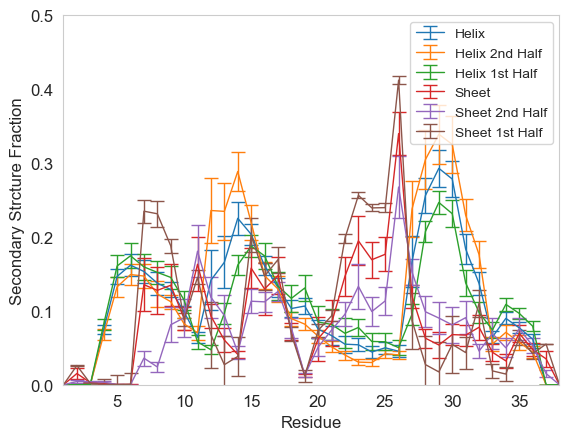

Average Helical Residues: 4.200 +_ 0.226
Average Fraction Helix: 0.114 +_ 0.006
Average Sheet Residues: 3.234 +_ 0.226
Average Fraction Sheet: 0.087 +_ 0.006


In [56]:
# compute the blocking error of the simulation to check for convergence 
trjH1 = md.load(rep0, top=pdb, stride=1)
H1 = top.select("resid 0 to 37")
trjH1.restrict_atoms(H1)
trjH1.center_coordinates()
frames = trjH1.n_frames
half = int(np.floor(frames/2))

dsspH1 = md.compute_dssp(trjH1, simplified=True)
dsspH1_h2 = md.compute_dssp(trjH1[half:-1], simplified=True)
dsspH1_h1 = md.compute_dssp(trjH1[0:half], simplified=True)

H1_H, H1_E = dssp_convert(dsspH1)
H1_H_h2, H1_E_h2 = dssp_convert(dsspH1_h2)
H1_H_h1, H1_E_h1 = dssp_convert(dsspH1_h1)

plt.errorbar(residue_number_offsetres, H1_H[:, 0], yerr=H1_H[:, 1], capsize=5, label='Helix')
plt.errorbar(residue_number_offsetres, H1_H_h2[:, 0], yerr=H1_H_h2[:, 1], capsize=5, label='Helix 2nd Half')
plt.errorbar(residue_number_offsetres, H1_H_h1[:, 0], yerr=H1_H_h1[:, 1], capsize=5, label='Helix 1st Half')
plt.errorbar(residue_number_offsetres, H1_E[:, 0], yerr=H1_E[:, 1], capsize=5, label='Sheet')
plt.errorbar(residue_number_offsetres, H1_E_h1[:, 0], yerr=H1_E_h1[:, 1], capsize=5, label='Sheet 2nd Half')
plt.errorbar(residue_number_offsetres, H1_E_h2[:, 0], yerr=H1_H_h2[:, 1], capsize=5, label='Sheet 1st Half')

plt.xlim(1, 38)
plt.ylim(0, 0.5)
plt.grid(False)
plt.legend(loc="upper right")
plt.xlabel('Residue')
plt.ylabel('Secondary Strcture Fraction')
np.savetxt(outdir+'Hprop.err.dat',
           np.column_stack((residue_number_offsetres, H1_H[:, 0], H1_H[:, 1])))
np.savetxt(outdir+'Eprop.err.dat',
           np.column_stack((residue_number_offsetres, H1_E[:, 0], H1_E[:, 1])))
plt.show()


# report helicity 
dsspH = np.copy(dsspH1)
dsspH[dsspH == 'H'] = 1
dsspH[dsspH == 'E'] = 0
dsspH[dsspH == 'C'] = 0
dsspH[dsspH == 'NA'] = 0
dsspH = dsspH.astype(int)
TotalH = np.sum(dsspH, axis=1)
np.save(outdir+"H_total" + ".npy", TotalH)

# report sheet
dsspE = np.copy(dsspH1)
dsspE[dsspE == 'H'] = 0
dsspE[dsspE == 'E'] = 1
dsspE[dsspE == 'C'] = 0
dsspE[dsspE == 'NA'] = 0
dsspE = dsspE.astype(int)
TotalE = np.sum(dsspE, axis=1)
np.save(outdir+"E_total" + ".npy", TotalE)

print("Average Helical Residues:%6.3lf" %
      (np.average(TotalH)), "+_%6.3lf" % ((block(TotalH)**.5)))
print("Average Fraction Helix:%6.3lf" %
      (np.average(TotalH)/37), "+_%6.3lf" % ((block(TotalH)**.5)/37))

print("Average Sheet Residues:%6.3lf" %
      (np.average(TotalE)), "+_%6.3lf" % ((block(TotalH)**.5)))
print("Average Fraction Sheet:%6.3lf" %
      (np.average(TotalE)/37), "+_%6.3lf" % ((block(TotalH)**.5)/37))


In [57]:
# calculate the bend / hydrogen bonded turns 
dssp = md.compute_dssp(trj, simplified=False)
dsspS = np.copy(dssp)
dsspT = np.copy(dssp)
dsspS[dsspS == 'H'] = 0
dsspS[dsspS == 'G'] = 0
dsspS[dsspS == 'I'] = 0
dsspS[dsspS == 'B'] = 0
dsspS[dsspS == 'E'] = 0
dsspS[dsspS == 'T'] = 0
dsspS[dsspS == 'S'] = 1
dsspS[dsspS == 'NA'] = 0
dsspS[dsspS == ' '] = 0
dsspS[dsspS == ''] = 0
dsspS = dsspS.astype(int)


dsspT = np.copy(dssp)
dsspT[dsspT == 'H'] = 0
dsspT[dsspT == 'G'] = 0
dsspT[dsspT == 'I'] = 0
dsspT[dsspT == 'B'] = 0
dsspT[dsspT == 'E'] = 0
dsspT[dsspT == 'T'] = 1
dsspT[dsspT == 'S'] = 0
dsspT[dsspT == 'NA'] = 0
dsspT[dsspT == ' '] = 0
dsspT[dsspT == ''] = 0
dsspT = dsspT.astype(int)

TotalS = np.sum(dsspS, axis=1)
print("Average Bend Residues:%6.3lf" %
      (np.average(TotalS)), "+_%6.3lf" % ((block(TotalS)**.5)))

TotalT = np.sum(dsspT, axis=1)
print("Average Bend Residues:%6.3lf" %
      (np.average(TotalT)), "+_%6.3lf" % ((block(TotalT)**.5)))

Average Bend Residues: 5.533 +_ 0.148
Average Bend Residues: 6.835 +_ 0.084


In [58]:
np.average(dsspS, axis=0)[19]

0.3254556209684234

In [59]:
np.average(dsspS, axis=0)[23]

0.24444381848398636

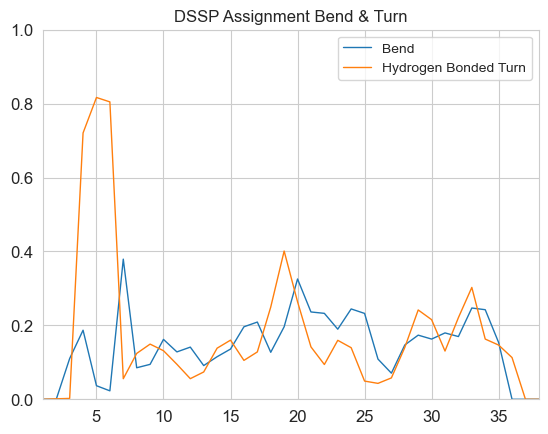

In [60]:
plt.plot(residue_number_offsetres, np.average(dsspS, axis=0), label = "Bend")
plt.plot(residue_number_offsetres, np.average(dsspT, axis=0), label="Hydrogen Bonded Turn")

plt.title("DSSP Assignment Bend & Turn")
plt.ylim(0.0, 1.0)
plt.xlim(1, 38)
plt.legend()
plt.show()

In [61]:
mass = []
for at in trj.topology.atoms:
    mass.append(at.element.mass)
mass_CA = len(mass)*[0.0]
# put the CA entries equal to 1.0
for i in trj.topology.select("name CA"):
    mass_CA[i] = 1.0
# calculate CA radius of gyration
rg_CA = md.compute_rg(trj, masses=np.array(mass_CA))
np.save(outdir+"Rg_total" + ".npy", rg_CA)
# SE_rg=(block(rg_all))**.5
time = np.linspace(0, 2840, trj.n_frames)
plt.clf()
plt.plot(time, rg_CA)
N = 100

plt.plot(time[:35402], np.convolve(rg_CA, np.ones(N)/N, mode='valid'))
plt.xlabel('Time (ns)')
plt.ylabel('Radius of Gyration')
plt.ylim(0.8, 3.0)
plt.xlim(0, 2840)

plt.tight_layout()
print("CA Radius of Gyration:%6.3lf" %
      np.average(rg_CA), "+_%6.3lf" % block(rg_CA)**.5)
print("1st Half CA Radius of Gyration:%6.3lf" % np.average(
    rg_CA[0:half]), "+_%6.3lf" % block(rg_CA[0:half])**.5)
print("2nd Half CA Radius of Gyration:%6.3lf" % np.average(
    rg_CA[half:-1]), "+_%6.3lf" % block(rg_CA[half:-1])**.5)

plt.savefig(outdir+'rg.pdf', dpi=200)
np.savetxt(outdir+'rg.dat', rg_CA)


CA Radius of Gyration: 1.247 +_ 0.014
1st Half CA Radius of Gyration: 1.283 +_ 0.009
2nd Half CA Radius of Gyration: 1.212 +_ 0.012


Here the original untruncated Sa plot is shown in order to display why the first microsecond of the simulation was discarded: 

In [62]:
trj = md.load(rep0, top=pdb, stride=1)
helix = md.load_pdb(helixpdb)
helix
top_helix = helix.topology
backbone_helix = top_helix.select("name CA")
backbone = top.select("name CA")

print("Number of residues: %d\n" % len(set(nres)))
RMS_start = 1
RMS_stop = 31
RMS = []
for i in range(RMS_start, RMS_stop):
    sel = top_helix.select("residue %s to %s and name CA" % (i, i+6))
    rmsd = md.rmsd(trj, helix, atom_indices=sel)
    RMS.append(rmsd)
RMS = np.asarray(RMS)
RMS

Sa_sum = np.zeros((trj.n_frames))
Sa = (1.0-(RMS/0.10)**8)/(1-(RMS/0.10)**12)
Sa_ave = np.average(Sa, axis=1)
Sa_total = np.sum(Sa, axis=0)
np.save(outdir+"Sa_total" + ".npy", Sa_total)

print("Sα:%6.3lf" % np.average(Sa_total),
      "+_%6.3lf" % block(Sa_total)**.5)

N = 300
plt.plot(Sa_total, label='Full', c='g')
plt.legend()
plt.xlabel('Frames')
plt.ylabel('Sα')
plt.tight_layout()
plt.ylim(0, 12)
plt.xlim(0, 3600)
plt.savefig(outdir+'Sa.timecourse.png', dpi=200)
np.savetxt(outdir+'Sa_total.dat', Sa_total)

Number of residues: 38

Sα: 1.425 +_ 0.089


In [63]:
N = 100
plt.plot(time[:35402], np.convolve(Sa_total, np.ones(N)/N, mode='valid'), label='Full', c='g')
plt.legend()
plt.xlabel('Frames')
plt.ylabel('Sα')
plt.tight_layout()
plt.ylim(0, 6)
plt.xlim(0, 2840)
plt.savefig(outdir+'Sa.timecourse.smooth.png', dpi=200)

[0.011 0.000 0.010 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000]
[0.602 0.111 0.156 0.049 0.033 0.017 0.012 0.008 0.008 0.002 0.002 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000]


/Users/f006j60/git/hIAPP_monomer_simulations/scripts/tools.py:104: RuntimeWarning: invalid value encountered in divide
  ferr = -(0.001987*T)*(error / average)


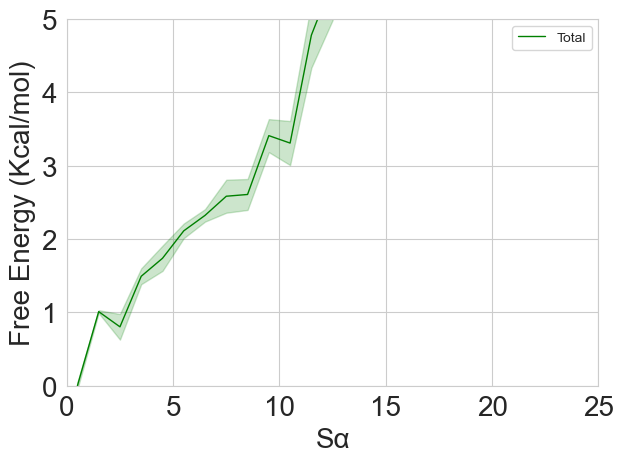

In [64]:
Sa_dg, edges, Sa_err = free_energy_1D_blockerror(Sa_total, 300, 0, 25, 25, 5)
plt.clf()
plt.plot(edges, Sa_dg, c='g', label='Total')
plt.fill_between(edges, Sa_dg-Sa_err, Sa_dg+Sa_err, color='g', alpha=0.2)


plt.legend()

plt.ylim(0, 5)
plt.xlim(0, 25)
plt.xlabel('Sα', size=20)
plt.ylabel('Free Energy (Kcal/mol)', size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(size='20')
plt.yticks(size='20')
plt.tight_layout()
plt.show()
np.savetxt(outdir+'Sa_dg.dat', np.column_stack((edges, Sa_dg, Sa_err)))
plt.savefig('%s/Sa.dG.png' % outdir)

In [65]:

def calc_err(contact_binary, name):
    boundfrac_by_frame = []
    t2 = []
    err_by_frame = []
    err_upper = []
    err_lower = []
    time = np.linspace(0, sim_length, len(rg_CA))
    stride = 100
    for i in range(stride, len(contact_binary), stride):
        Data = np.asarray(contact_binary[0:i])
        bf, be = get_blockerror_pyblock_nanskip(Data)
        boundfrac_by_frame.append(bf)
        err_by_frame.append(be)
        err_upper.append(bf-be)
        err_lower.append(bf+be)
        t2.append(time[i])

    np.savetxt(outdir + name, np.column_stack((t2, boundfrac_by_frame, err_upper, err_lower)), '%.4f')

calc_err(rg_CA, 'rg.be.dat')
calc_err(Sa_total, 'Sa.be.dat')


In [66]:
contact_maps = []
contact_distances = []
for i in residue_number:
    contact_map = []
    contact_distance = []
    for j in residue_number:
        if i == j:
            contacts = 0
        else:
            dist = md.compute_contacts(trj, [[i, j]])
            array = np.asarray(dist[0]).astype(float)
            distance = np.average(array)
            contact_distance.append(distance)
            contact = np.where(array < 0.8, 1, 0)
            contacts = np.average(contact)
        contact_map.append(contacts)
    contact_maps.append(contact_map)
    contact_distances.append(contact_distance)
final_map = np.asarray(contact_maps).astype(float)
final_distance = np.asarray(contact_distances).astype(float)


In [67]:
sequence_ol = []
for i in range(0, len(sequence)):
    sequence_ol.append(str(trj.topology.residue(i).code))
sequence_ol = sequence_ol[:-1]
sequence_ol.append("    NH2") # append NH2

In [68]:
print(sequence_ol)

['K', 'C', 'N', 'T', 'A', 'T', 'C', 'A', 'T', 'Q', 'R', 'L', 'A', 'N', 'F', 'L', 'V', 'H', 'S', 'G', 'N', 'N', 'F', 'G', 'A', 'I', 'L', 'S', 'S', 'T', 'N', 'V', 'G', 'S', 'N', 'T', 'Y', '    NH2']


<Figure size 640x480 with 0 Axes>

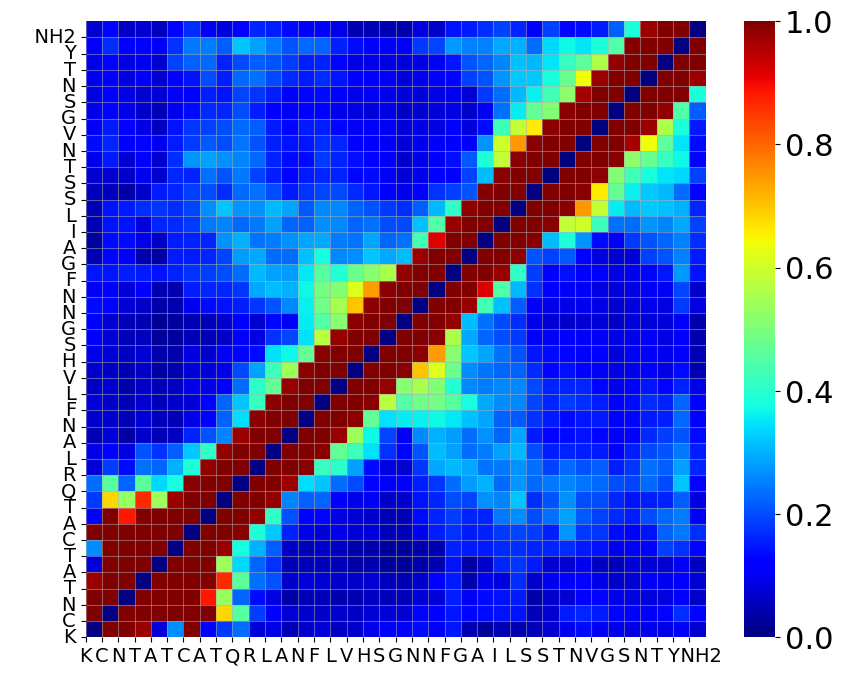

<Figure size 640x480 with 0 Axes>

In [69]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
contact_map = final_map

plt.clf()
# Make distance map
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
im = sns.heatmap(contact_map, cmap='jet', ax=ax)
ax.grid(which='both', alpha=0.5)
plt.xticks(np.arange(0, len(residue_number_offsetres)), sequence_ol, rotation=0, size=14)
plt.yticks(np.arange(0, len(residue_number_offsetres)), sequence_ol, rotation=0, size=14)
cbar = im.collections[0].colorbar
cbar.ax.tick_params(labelsize=22)
ax.invert_yaxis()
plt.show()

np.savetxt(outdir+'contactmap.dat', final_map)
plt.savefig(outdir+'contact_map.png')
plt.savefig(outdir+'contact_map.pdf')
plt.show()

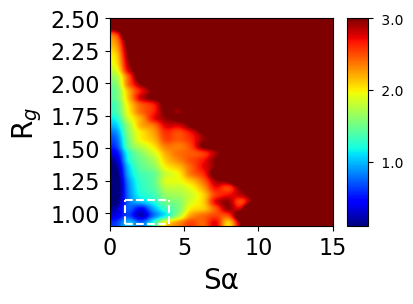

In [70]:
plt.figure(figsize=(3.6,2.7))
a, xedges, yedges = np.histogram2d(
    rg_CA, Sa_total, 30, [[0.9, 2.5], [0, 25.0]], normed=True, weights=None)
a = np.log(np.flipud(a)+.000001)
T = 300
a = -(0.001987*T)*a

im = plt.imshow(a, interpolation='gaussian', extent=[
                yedges[0], yedges[-1], xedges[0], xedges[-1]], cmap='jet', aspect='auto')
cbar_ticks = [0, 1, 2, 3, 4, 5]

imaxes = plt.gca()
plt.xlim(0, 15)
plt.ylim(0.9,2.5)
plt.ylabel("R$_g$", size=20, labelpad=5)
plt.xlabel("Sα", size=20, labelpad=5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(size='16')
plt.yticks(size='16')
cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'),
                aspect=10)
#plt.axes(cb.ax)
plt.clim(vmin=0.1, vmax=3.0)
plt.hlines(1.1,1.0,4.0,colors="white", linestyles="dashed")
plt.hlines(0.92,1.0,4.0,colors="white", linestyles="dashed")
plt.vlines(1.0,0.92, 1.1,colors="white", linestyles="dashed")
plt.vlines(4.0,0.92, 1.1,colors="white", linestyles="dashed")
plt.show()
np.savetxt(outdir+'Apo.Rg_v_Sa.dG.dat', a)
plt.savefig(outdir+'Apo.Rg_v_Sa.dG.pdf', bbox_inches="tight",dpi=400)


In [71]:
res20_bend = np.where(dsspS[:,19]==1)[0]
res24_bend = np.where(dsspS[:,23]==1)[0]
bend_both = np.intersect1d(res20_bend, res24_bend)

In [72]:
only_res20 = np.setdiff1d(res20_bend, bend_both)
only_res24 = np.setdiff1d(res24_bend, bend_both)

<Figure size 640x480 with 0 Axes>

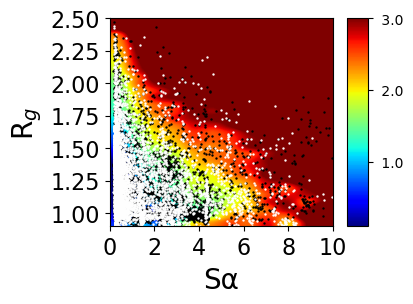

In [73]:
rg_sa = np.loadtxt(outdir+'Apo.Rg_v_Sa.dG.dat')
plt.figure(figsize=(3.6,2.7))
im = plt.imshow(rg_sa, interpolation='gaussian', extent=[
                yedges[0], yedges[-1], xedges[0], xedges[-1]], cmap='jet', aspect='auto')
cbar_ticks = [0, 1, 2, 3, 4, 5]

imaxes = plt.gca()
plt.xlim(0, 10)
plt.ylim(0.9,2.5)
plt.ylabel("R$_g$", size=20, labelpad=5)
plt.xlabel("Sα", size=20, labelpad=5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(size='16')
plt.yticks(size='16')
cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'),
                aspect=10)
#plt.axes(cb.ax)
plt.clim(vmin=0.1, vmax=3.0)

# plot the res20 and res 24 
plt.scatter(Sa_total[only_res20], rg_CA[only_res20], color="k", s=0.5)
plt.scatter(Sa_total[only_res24], rg_CA[only_res24], color="white", s=0.5)


plt.show()

In [74]:
sa_rg_basin = trj.slice(np.intersect1d(np.where(rg_CA < 1.1)[0], np.where(rg_CA > 0.9)[0]))
sa_rg_basin.save_gro(outdir + "/sa_rg_basin.gro")

In [75]:
dists = np.arange(0, 10, 0.1)
def sigmoid(x, a, b):
      
    z = np.exp(-(a*x+b))
    sig = 1- 1 / (1 + z)

    return sig
# switch = (1.0-((dists-max)/min)**8)/(1-((dists-max)/min)**12)

# plt.plot(dists,sigmoid(dists, 3, -16.3))
# plt.show()



[2.289 2.093 2.153 ... 2.014 1.999 0.539]


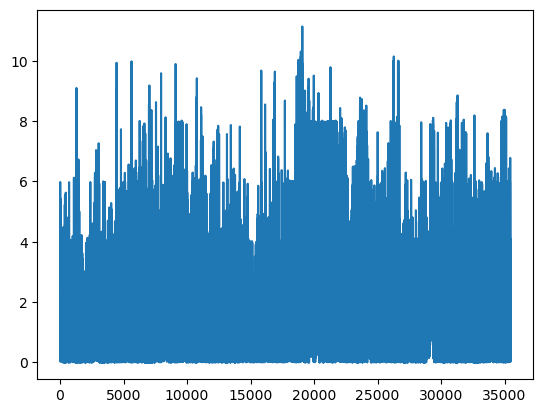

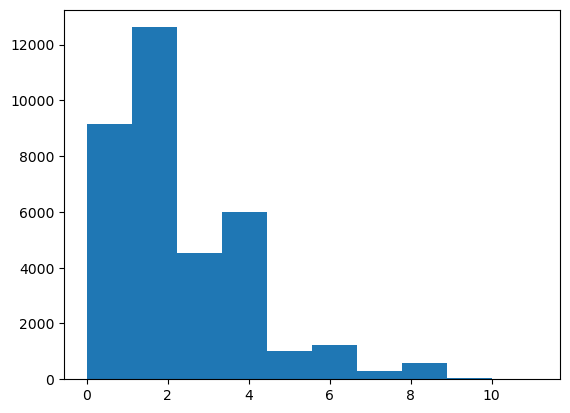

<Figure size 640x480 with 0 Axes>

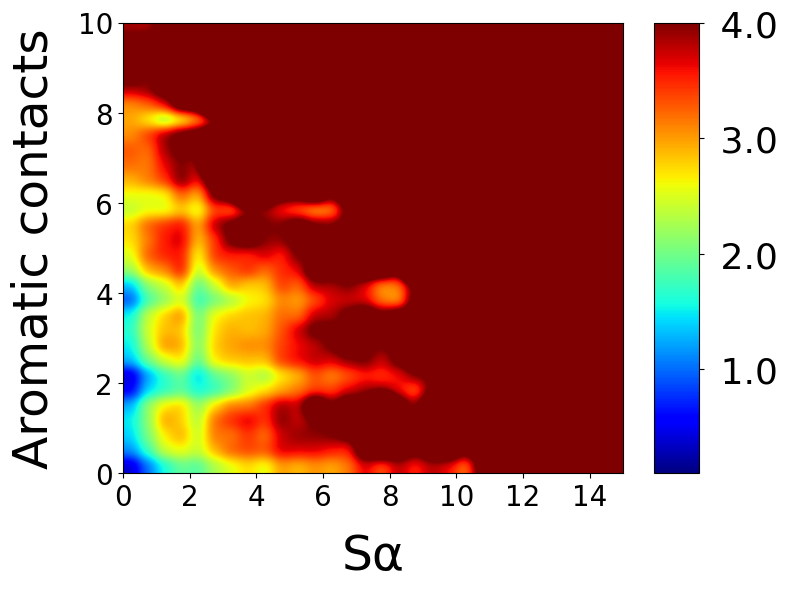

In [76]:
# Protein-protein
# Cut-off 4A, 7A
# 'closest-heavy'
prot_aromatic_res_index = [14, 17, 22, 36]
aromatic_contact_pairs = []
for i in range(len(prot_aromatic_res_index)):
    aromatic_contact_pair = []
    for j in range(len(prot_aromatic_res_index)): 
        pair = [prot_aromatic_res_index[i], prot_aromatic_res_index[j]]
        dist = md.compute_contacts(trj, [pair], scheme='closest-heavy')
        dists = np.asarray(dist[0]).astype(float)
        switch_aro = sigmoid(dists*10, 3, -16.3)
        aromatic_contact_pair.append(switch_aro)
    aromatic_contact_pairs.append(aromatic_contact_pair) 
aromatic_contact_pairs = np.asarray(aromatic_contact_pairs).astype(float)
aromatic_contact_sum = aromatic_contact_pairs.sum(axis = 0).sum(axis = 0)- len(prot_aromatic_res_index)
aromatic_contact_sum = aromatic_contact_sum[:,0]
print(aromatic_contact_sum)
plt.plot(aromatic_contact_sum)
plt.show()
plt.clf()

plt.hist(aromatic_contact_sum)
plt.show()
plt.clf()


dG, xedges, yedges = free_energy(aromatic_contact_sum, Sa_total, 300, 0, 10, 0, 15)

fig = plt.figure(figsize=(8, 6))
im = plt.imshow(dG, interpolation='gaussian', extent=[
                yedges[0], yedges[-1], xedges[0], xedges[-1]], cmap='jet', aspect='auto')
cbar_ticks = [0, 1, 2, 3, 4]
cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'),
                  aspect=10)  # grab the Colorbar instance
imaxes = plt.gca()
plt.xlabel("Sα", size=35, labelpad=15)
plt.ylabel("Aromatic contacts", size=35, labelpad=15)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.xticks(size='20')
plt.yticks(size='20')
plt.axes(cb.ax)
plt.clim(vmin=0.1, vmax=4.0)
plt.yticks(size='26')
plt.tight_layout()
plt.show()
np.savetxt(outdir+'Sa_v_aromatic.dG.dat', dG)
plt.savefig(outdir+'Sa_v_aromatic.pdf')


# dG, xedges, yedges = free_energy(aromatic_contact_sum, Sa_total, 150, 0, 31, 0, 5)

# fig = plt.figure(figsize=(8, 6))
# im = plt.imshow(dG, interpolation='gaussian', extent=[
#                 yedges[0], yedges[-1], xedges[0], xedges[-1]], cmap='jet', aspect='auto')
# cbar_ticks = [0, 1, 2, 3]
# cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'),
#                   aspect=10)  # grab the Colorbar instance
# imaxes = plt.gca()
# plt.xlabel("Sα", size=35, labelpad=15)
# plt.ylabel("Aromatic contacts", size=35, labelpad=15)
# plt.xticks(fontsize=35)
# plt.yticks(fontsize=35)
# plt.xticks(size='26')
# plt.yticks(size='32')
# plt.axes(cb.ax)
# plt.clim(vmin=0.1, vmax=3.0)
# plt.yticks(size='26')
# plt.tight_layout()
# # np.savetxt(outdir+'Sa_v_aromatic.dG.dat', dG)
# plt.savefig(outdir+'Sa_v_aromatic.pdf')

In [77]:
Sa_vs_aromatic = np.column_stack((Sa_total, aromatic_contact_sum))
Sa_min = [0,0,2]
Sa_max = [2,2,4]
aromatic_min = [5, 15,5]
aromatic_max = [15, 25,15]
basin = []
for i in range(len(Sa_min)):
    Sa_basin = np.where((Sa_vs_aromatic[:, 0] > Sa_min[i]) & (Sa_vs_aromatic[:, 0] < Sa_max[i]))[0]
    aromatic_basin = np.where((Sa_vs_aromatic[:, 1] > aromatic_min[i]) & (Sa_vs_aromatic[:, 1] < aromatic_max[i]))[0]
    basin_index = np.intersect1d(Sa_basin, aromatic_basin)
    newtraj = trj[basin_index]
    md.Trajectory.save_xtc(newtraj, outdir + 'Sa.aromatic.%s.xtc' % i)
    print(newtraj)
    basin.append(basin_index)
print(basin)

<mdtraj.Trajectory with 1737 frames, 533 atoms, 38 residues, and unitcells>
<mdtraj.Trajectory with 0 frames, 533 atoms, 38 residues, and unitcells>
<mdtraj.Trajectory with 507 frames, 533 atoms, 38 residues, and unitcells>
[array([   14,    15,    16, ..., 35437, 35443, 35452]), array([], dtype=int64), array([    8,  5610,  5815,  5826,  5841,  5864,  5971,  5974,  5977,
        5987,  5991,  5992,  5995,  6001,  6002,  6004,  6007,  6008,
        6010,  6018,  6025,  6034,  6065,  6081,  6094,  6329,  6432,
        6434,  6436,  6438,  6441,  6463,  6470,  6543,  6572,  6575,
        6584,  6590,  6592,  6595,  6599,  6615,  6647,  6655,  6701,
        6730,  6735,  6754,  7012,  7182,  7513,  7550,  7686,  8915,
        8988,  9524,  9530,  9768, 10322, 10505, 10884, 11425, 11432,
       11434, 11439, 11445, 11528, 12862, 13246, 13543, 13560, 13564,
       13566, 13569, 13587, 13603, 13685, 13688, 13691, 14148, 14784,
       15848, 16823, 16824, 17795, 17796, 17799, 17800, 17804, 17

/Users/f006j60/miniconda3/envs/labconda/lib/python3.9/site-packages/mdtraj/utils/unitcell.py:78: UserWarning: All your angles were less than 2*pi. Did you accidentally give me radians?
  warnings.warn('All your angles were less than 2*pi. Did you accidentally give me radians?')


In [78]:
indices_phi, phis = md.compute_phi(trj)
indices_psi, psis = md.compute_psi(trj)
indices_chi1, chi1s = md.compute_chi1(trj)
indices_chi2, chi2s = md.compute_chi2(trj)

In [79]:
phi_dict={}
dihedral_dict = { 'phi': { },
          'psi': { },
          'chi1': { },
          'chi2': { }}
top = trj.top
for i in range(0,len(indices_phi)):
  indices=indices_phi[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['phi'][resnum]=phis[:,i]

for i in range(0,len(indices_psi)):
  indices=indices_psi[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['psi'][resnum]=psis[:,i]

for i in range(0,len(indices_chi1)):
  indices=indices_chi1[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['chi1'][resnum]=chi1s[:,i]

for i in range(0,len(indices_chi2)):
  indices=indices_chi2[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['chi2'][resnum]=chi2s[:,i]

In [80]:
#Heres a function to plot a phi/psi ramachandran plot:

def plot_phipsi(res):
 plt.hist2d(dihedral_dict['phi'][res],dihedral_dict['psi'][res],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
 plt.xlabel('$\phi$', size=18)
 plt.ylabel('$\psi$', size=18)
 plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.tick_params(labelsize=18)
 plt.show()
 return

def plot_chi(res):
    if res in dihedral_dict['chi1']:
        plt.hist(dihedral_dict['chi1'][res],bins=36,range=[-3.14,3.14])        
        plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
        plt.xlabel('$\chi_1$', size=18)
        plt.ylabel('counts', size=18)
        plt.tick_params(labelsize=18)
        plt.show()
        plt.clf()   
    
    if res in dihedral_dict['chi2']:
     print("here")
     plt.hist2d(dihedral_dict['chi1'][res],dihedral_dict['chi2'][res],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
     plt.xlabel('$\chi_1$', size=18)
     plt.ylabel('$\chi_2$', size=18)
     plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.tick_params(labelsize=18)
     plt.show()
    return

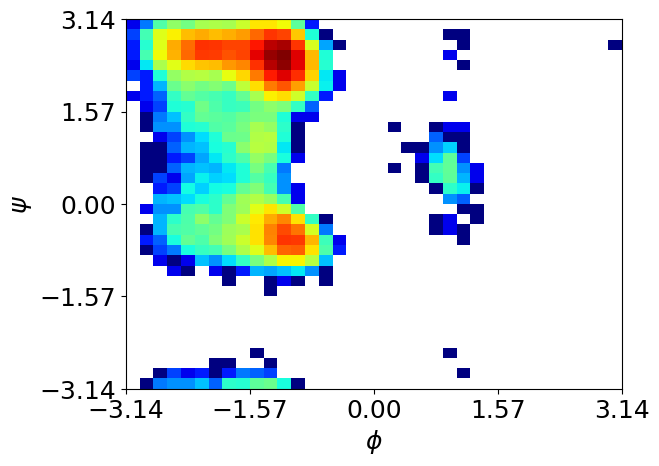

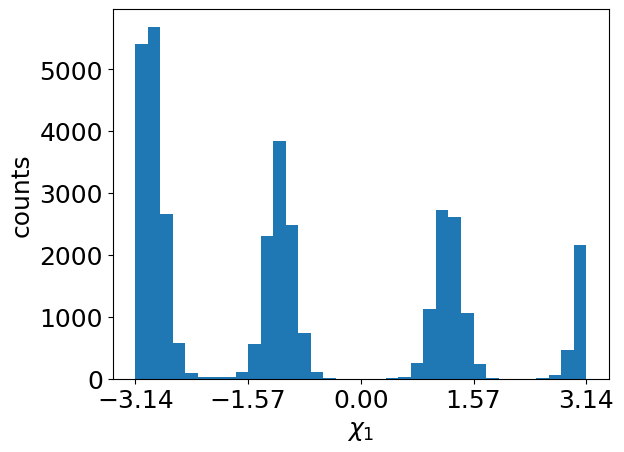

In [81]:
from matplotlib import colors
plt.clf()
plot_phipsi(7)
plt.clf()
plot_chi(7)

In [82]:
# find the indices for the dihedrals we want to calculate 

trj.xyz.shape

(35501, 533, 3)

In [83]:
def get_xyz_from_indx(indx): 
    return trj.xyz [:,indx]

(35501, 3)


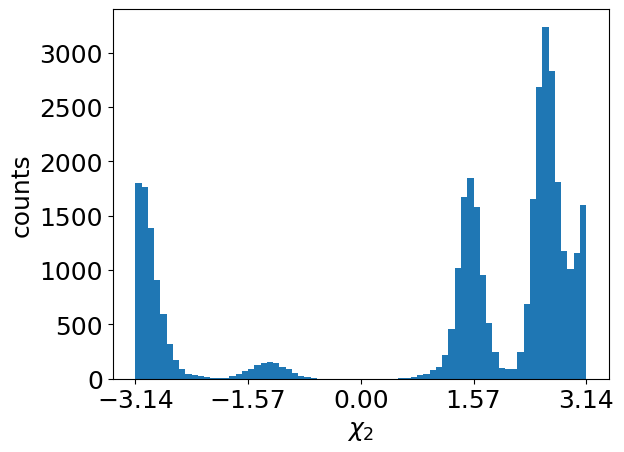

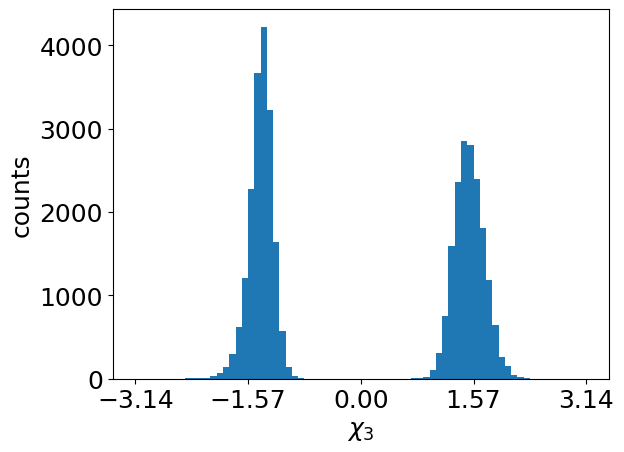

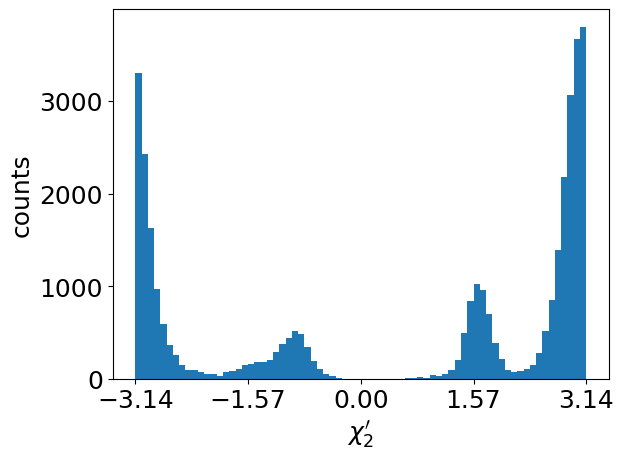

In [84]:
# x2 x3 x2p 
indxs = [[26,28,31,93], [28,31,93,90], [31,93,90,88]]

labels = ['$\chi_2$', '$\chi_3$', '$\chi_2\'$']

x2 = md.compute_dihedrals(trj,indxs)
print(x2.shape)
for i in range(3):
    angle_ls = x2[:,i] 
    lab = labels[i]
    plt.hist(angle_ls,bins=72,range=[-3.14,3.14])      
    plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
    plt.xlabel(lab, size=18)
    plt.ylabel('counts', size=18)
    plt.tick_params(labelsize=18)
    #plt.plot(angle_ls)
    plt.show()
#plt.clf() 

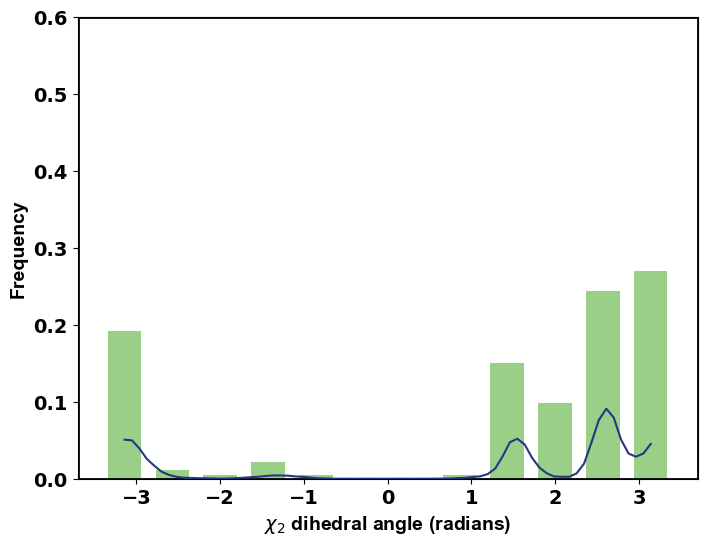

In [85]:
import pandas as pd
hfont = {"fontname":"arial"}
col = ['chi_2', 'chi_3', 'chi_2p']
df_ang = pd.DataFrame(data=x2, columns=col)
fig = plt.figure(figsize=(8,6), frameon=False, edgecolor="k")
#df_ang["chi_2"].hist(bins=6)
x = np.linspace(start=-3.14, stop=3.14, num=12)
plt.bar(x,df_ang['chi_2'].value_counts(bins=12, sort=False).to_numpy()/trj.n_frames, width=0.4, alpha=0.8, color="#81C469")
x = np.linspace(start=-3.14, stop=3.14, num=72)
y = df_ang['chi_2'].value_counts(bins=72, sort=False).to_numpy()/trj.n_frames
plt.plot(x,y, "-", color="#253685")
plt.xlabel("$\chi_{2}$ dihedral angle (radians)", fontweight="bold", fontsize=14, **hfont)
plt.ylabel("Frequency", fontweight="bold", fontsize=14, **hfont)
plt.xticks(fontweight="bold", fontsize=14)
plt.yticks(fontweight="bold", fontsize=14)
plt.grid(visible=False)
#plt.axhline(linewidth=2, color="k")
plt.axhspan(0, 0,linewidth=2, color="k")
plt.axhspan(0.6, 0.6,linewidth=2, color="k")
#plt.axvline(linewidth=2, color="k")
plt.axvspan(-3.7,-3.7, linewidth=2, color="k")
plt.axvspan(3.7,3.7, linewidth=2, color="k")
plt.xlim((-3.7,3.7))
plt.ylim((0, 0.6))
plt.show()


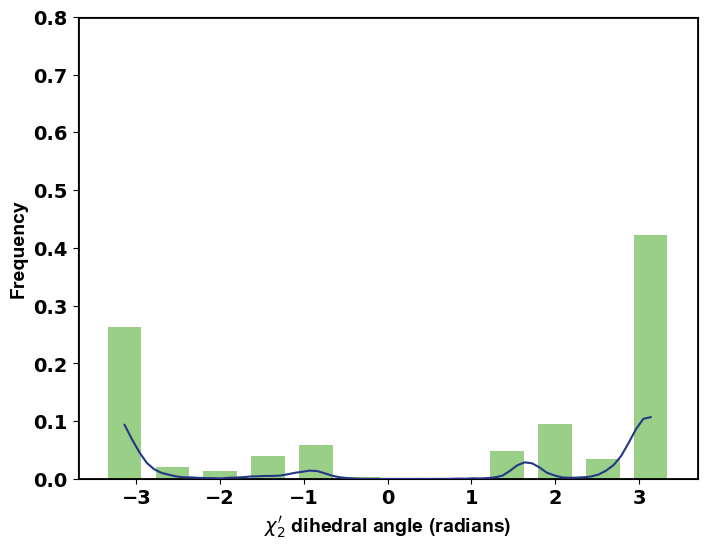

In [86]:
fig = plt.figure(figsize=(8,6), frameon=False, edgecolor="k")
#df_ang["chi_2"].hist(bins=6)
x = np.linspace(start=-3.14, stop=3.14, num=12)
plt.bar(x,df_ang['chi_2p'].value_counts(bins=12, sort=False).to_numpy()/trj.n_frames, width=0.4, alpha=0.8, color="#81C469")
x = np.linspace(start=-3.14, stop=3.14, num=72)
y = df_ang['chi_2p'].value_counts(bins=72, sort=False).to_numpy()/trj.n_frames
plt.plot(x,y, "-", color="#253685")
plt.xlabel("$\chi_{2}\'$ dihedral angle (radians)", fontweight="bold", fontsize=14, **hfont)
plt.ylabel("Frequency", fontweight="bold", fontsize=14, **hfont)
plt.xticks(fontweight="bold", fontsize=14)
plt.yticks(fontweight="bold", fontsize=14)
plt.grid(visible=False)
#plt.axhline(linewidth=2, color="k")
plt.axhspan(0, 0,linewidth=2, color="k")
plt.axhspan(0.8, 0.8,linewidth=2, color="k")
#plt.axvline(linewidth=2, color="k")
plt.axvspan(-3.7,-3.7, linewidth=2, color="k")
plt.axvspan(3.7,3.7, linewidth=2, color="k")
plt.xlim((-3.7,3.7))
plt.ylim((0, 0.8))
plt.show()

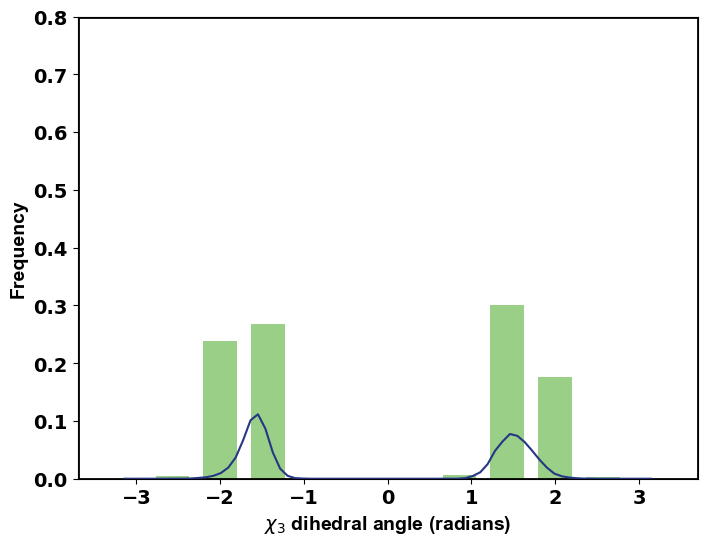

In [87]:
fig = plt.figure(figsize=(8,6), frameon=False, edgecolor="k")
#df_ang["chi_2"].hist(bins=6)
x = np.linspace(start=-3.14, stop=3.14, num=12)
plt.bar(x,df_ang['chi_3'].value_counts(bins=12, sort=False).to_numpy()/trj.n_frames, width=0.4, alpha=0.8, color="#81C469")
x = np.linspace(start=-3.14, stop=3.14, num=72)
y = df_ang['chi_3'].value_counts(bins=72, sort=False).to_numpy()/trj.n_frames
plt.plot(x,y, "-", color="#253685")
plt.xlabel("$\chi_{3}$ dihedral angle (radians)", fontweight="bold", fontsize=14, **hfont)
plt.ylabel("Frequency", fontweight="bold", fontsize=14, **hfont)
plt.xticks(fontweight="bold", fontsize=14)
plt.yticks(fontweight="bold", fontsize=14)
plt.grid(visible=False)
#plt.axhline(linewidth=2, color="k")
plt.axhspan(0, 0,linewidth=2, color="k")
plt.axhspan(0.8, 0.8,linewidth=2, color="k")
#plt.axvline(linewidth=2, color="k")
plt.axvspan(-3.7,-3.7, linewidth=2, color="k")
plt.axvspan(3.7,3.7, linewidth=2, color="k")
plt.xlim((-3.7,3.7))
plt.ylim((0, 0.8))
plt.show()

## Cluster Analysis

In [88]:
sequence_ol_s20g = ['K', 'C', 'N', 'T', 'A', 'T', 'C', 'A', 'T', 'Q', 'R', 'L', 'A', 'N', 'F', 'L', 'V', 'H', 'S', 'G', 'N', 'N', 'F', 'G', 'A', 'I', 'L', 'S', 'S', 'T', 'N', 'V', 'G', 'S', 'N', 'T', 'Y', '      NH$_2$']

In [89]:
from matplotlib.colors import ListedColormap
from cycler import cycler
from matplotlib import colormaps 
import pickle

# Define the number of shades in the gradient
num_grays = 8
# Create a list of distinct gray values
grays = np.linspace(0.0, 0.8, num_grays)
# Create a ListedColormap with distinct gray values
custom_pastel_gray_cmap = ListedColormap([(gray, gray, gray) for gray in grays])

# create color map and cycler for clusters 
max_num_clusters = 5
viridis = colormaps['viridis'].resampled(max_num_clusters)
default_cycler = cycler(color=viridis(range(max_num_clusters)))
viridis_hex = ["#3E0651","#3A487B", "#478F8A", "#7AC76D", "#F9E855"]

######## Clusters ########
with open(outdir+"/kmeans_cluster_indices.pkl", "rb") as f: 
    c_dict = pickle.load(f)

In [90]:
# check contact maps 
contact_maps = []
distance_maps = []
populations = []

# trjs = []
for i in range(len(c_dict.keys())):
    frame_ind = c_dict[i]
    temptrj = trj.slice(frame_ind)
    print(temptrj.n_frames)
    populations.append(np.round(temptrj.n_frames/trj.n_frames *100, 2))
    # trjs.append(trj)
    # contact map 
    final_map, final_distance = contact_map_avg(temptrj, prot_len=38, cutoff=0.8)
    contact_maps.append(final_map)
    distance_maps.append(final_distance)

3753
5478
18664
7606


 C1, P=10.57
 C2, P=15.43
 C3, P=52.57
 C4, P=21.42


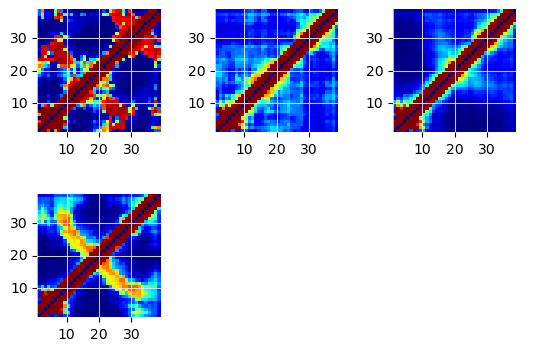

In [91]:
# contact maps no labels 
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(6.5,4))
n_clusters = 4
for mapi, ax in enumerate(axs.flatten()): 
    if mapi > n_clusters-1: 
        continue 
    im = sns.heatmap(contact_maps[mapi], cmap='jet', ax=ax, vmin=0.0, vmax = 1.0, square=True, cbar=False)
    ax.grid(which='major', alpha=0.5)
    ax.set_xticks([9, 19, 29], [ 10, 20, 30], rotation=0, size=10)
    ax.set_yticks([9,19,29], [ 10, 20, 30], rotation=0, size=10)
    ax.invert_yaxis()
    ax.set_ylim(0,38.0)
    ax.set_xlim(0,38.0)
    for x in [0, 9, 19, 29]:
        ax.axvline(x=x, color='white', linestyle='-', linewidth=0.5)
        ax.axhline(y=x, color='white', linestyle='-', linewidth=0.5)
    print(' C%s' % str(mapi+1) + ", P=" + str(populations[mapi]))
axs.flat[-1].axis('off')
axs.flat[-2].axis('off')
plt.subplots_adjust( hspace=0.5)  # Increased vertical spacing
plt.savefig(outdir+"/s20g_iapp_apo_contact_by_cluster.pdf", dpi=400)
plt.show()

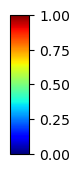

In [92]:
# Create a separate figure for the colorbar
fig_colorbar, ax_cbar = plt.subplots(figsize=(0.25, 1.8))  # Set width to 0.5 for a slim colorbar

# Generate a colorbar with the same colormap and value range
norm = mpl.colors.Normalize(vmin=0.0, vmax=1.0)
cbar = mpl.colorbar.ColorbarBase(ax_cbar, cmap='jet', norm=norm)

# Label the colorbar, if desired
# cbar.set_label('Contact Probability')

plt.savefig(outdir+"/s20g_iapp_apo_contact_by_cluster_cbar.pdf", dpi=400, bbox_inches="tight")

plt.show()

/Users/f006j60/git/hIAPP_monomer_simulations/scripts/tools.py:63: RuntimeWarning: invalid value encountered in divide
  M = (cumsum( ((gamma/s)**2*2**arange(1,d+1)[::-1])[::-1] )  )[::-1]


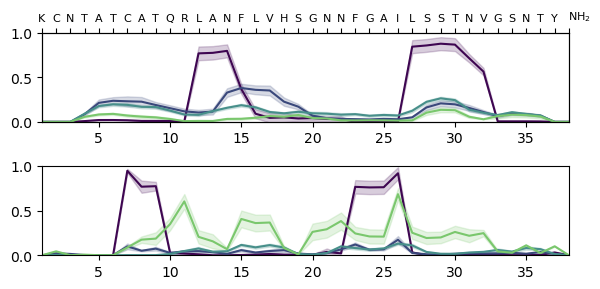

In [93]:
fig, axes = plt.subplots(2, 1, figsize=(6,3.0))

for i in range(n_clusters): 
    H1_H, H1_E = dssp_convert(dsspH1[c_dict[i]])

    axes[0].plot(residue_number_offsetres, H1_H[:, 0], label='Helix', color=viridis_hex[i])
    axes[0].fill_between(residue_number_offsetres, H1_H[:, 0]-H1_H[:, 1],
                     H1_H[:, 0]+H1_H[:, 1], alpha=0.2, color=viridis_hex[i])
    axes[0].set_xlim(1,38)
    axes[0].set_ylim(0,1.0)
    
    axes[1].plot(residue_number_offsetres, H1_E[:, 0], label='Sheet', color=viridis_hex[i])
    axes[1].fill_between(residue_number_offsetres, H1_E[:, 0]-H1_E[:, 1],
                     H1_E[:, 0]+H1_E[:, 1], alpha=0.2, color=viridis_hex[i])
    axes[1].set_xlim(1,38)
    axes[1].set_ylim(0,1.0)
ax2 = axes[0].twiny()
top_ticks = np.arange(0, 38, 1)
plt.grid(True)
plt.tight_layout()
ax2.set_xticks(top_ticks)
ax2.set_xticklabels([f'{i}' for i in sequence_ol_s20g[0::1]], fontsize=8)
ax2.grid(False)
plt.savefig(outdir+'/Hprop.Eprop.s20g.apo.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [94]:
# compute SASA
solv = md.shrake_rupley(trj, mode="residue")
np.save(outdir+"/sasa.npy", solv)

27.693115 52.037876 0.8357335012993387 2.640734313246907 0 21
27.693115 52.037876 0.8357335012993387 2.640734313246907 0 21
27.693115 52.037876 0.8357335012993387 2.640734313246907 0 21


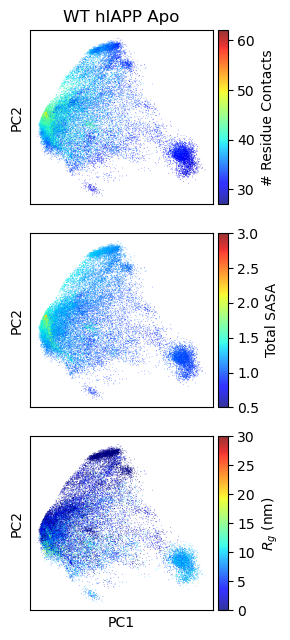

In [95]:
from mpl_toolkits.axes_grid1 import make_axes_locatable 
PCs = np.load(outdir+"/incPCs.npy")
bds = [[0,28], [27,62], [0.5,3.0], [0,30]]

# load in quantities 
Rg = np.load(outdir+"/Rg_total" + ".npy")
Sa = np.load(outdir+"/Sa_total" + ".npy")
H_tot = np.load(outdir+"/H_total" + ".npy")
solv_sum = np.sum(np.load(outdir+"/sasa.npy"), axis=1)

# labels 
cbar_lbl = ["# Residue Contacts", "Total SASA", "$R_g$ (nm)", "H Total"]

# create one plot to show all 4 quantities 
fig, axes = plt.subplots(3,1, figsize=(3,6.5), sharey=True, sharex=True)
ax = axes.flatten()

# project onto the surface 
for k, var in enumerate([solv_sum, Rg, H_tot]): 
    print(solv_sum.min(), solv_sum.max(), Rg.min(), Rg.max(), H_tot.min(), H_tot.max())
    scatt = ax[k].scatter(PCs[:,0],PCs[:,1], marker = ".", alpha=0.8, c=var, cmap="jet", s=1, edgecolors="None", vmin=bds[k+1][0], vmax=bds[k+1][1])
    # ax.legend(loc='best', ncol=1)
    
    ax[k].set_ylabel("PC2")
    
    ax[k].grid(False)
    ax[k].set_xticks([])
    ax[k].set_yticks([])
    # Add color bar
    divider = make_axes_locatable(ax[k])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(scatt, cax=cax)
    cbar.set_label(cbar_lbl[k],fontsize=10)  # Set your desired label
axes[0].set_title("WT hIAPP Apo")
axes[-1].set_xlabel("PC1")
plt.tight_layout()
plt.savefig( outdir + "project_SASA_Rg_H_total.png", dpi=400, bbox_inches="tight")
plt.show()